In [1]:
import serial

In [ ]:
arduino = serial.Serial('/dev/ttyACM0', 9600, timeout=1)


In [5]:
arduino.readline().decode()

'1131\r'

In [4]:
# opencv_fullbody_Detection.py : 파라미터 변경시켜 한개 cascade 대해 출력
import numpy as np
import cv2
from matplotlib import pyplot as plt

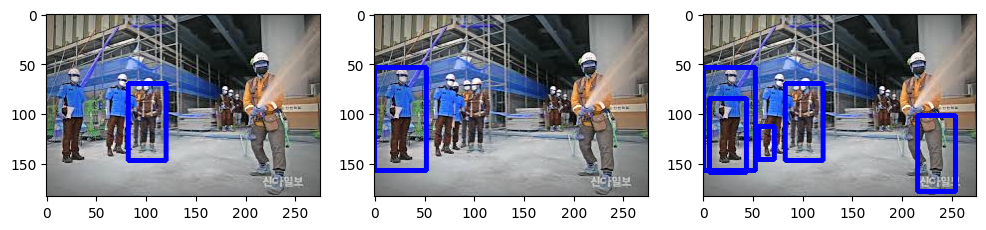

In [17]:
filename = "../data/image_0.jpeg"
# 예측할 그림 가져오기, gray convert
image1 = cv2.imread(filename)
grayImage1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

image2 = cv2.imread(filename)
grayImage2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

image3 = cv2.imread(filename)
grayImage3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

# cascade xml 파일 선택
body_cascade = cv2.CascadeClassifier('../data/haarcascade_fullbody.xml')


# 10 = 검출한 사각형 사이 최소 간격, body에 x,y,w,h가 여러개 저장됨.
body = body_cascade.detectMultiScale(grayImage1, 1.01, 10, minSize=(10, 10))

for (x,y,w,h) in body :         
    cv2.rectangle(image1,(x,y),(x+w,y+h),(0,0,255),3)

plt.figure(figsize=(12,10))
plt.subplot(1, 3, 1)
plt.imshow(image1, cmap='gray')

# 2 = 검출한 사각형 사이 최소 간격, minSize = 지정한 크기 이상의 사각형만 가져온다.
body = body_cascade.detectMultiScale(grayImage2, 1.01, 2, 0, minSize=(50, 50))

for (x,y,w,h) in body :        
    cv2.rectangle(image2,(x,y),(x+w,y+h),(0,0,255),3)

plt.subplot(1, 3, 2)
plt.imshow(image2, cmap='gray')

# minSize가 없을 때의 결과
body = body_cascade.detectMultiScale(grayImage3, 1.01, 2)
for (x,y,w,h) in body : 
    cv2.rectangle(image3,(x,y),(x+w,y+h),(0,0,255),3)

plt.subplot(1, 3, 3)

plt.imshow(image3, cmap='gray')

plt.show()